# GloFAS reforecast threshold check
<!-- markdownlint-disable MD013 -->
Check how long we can extend the leadtime using the same threshold as the reanalysis before the years we trigger on changes.

In [2]:
%load_ext jupyter_black
%load_ext autoreload
%autoreload 2

In [90]:
import pandas as pd
import matplotlib.pyplot as plt

from src.datasources import glofas
from src.utils.rp_calc import calculate_groups_rp, calculate_one_group_rp

## Load data

In [4]:
df_ref_ens = pd.read_parquet(
    glofas.GF_PROC_DIR / "wuroboki_glofas_reforecast_ens.parquet"
)

In [5]:
df_ref = (
    df_ref_ens.groupby(["valid_time", "leadtime"])["dis24"]
    .mean()
    .reset_index()
)

Plot one year and leadtime to check

<Axes: xlabel='valid_time'>

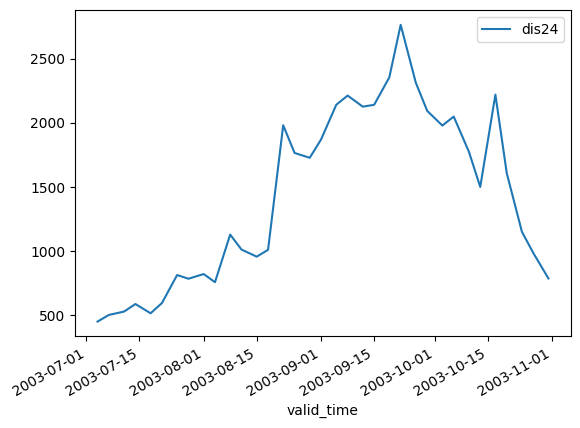

In [6]:
df_ref[
    (df_ref["valid_time"].dt.year == 2003) & (df_ref["leadtime"] == 1)
].set_index("valid_time").plot(y="dis24")

In [7]:
df_ref_peaks = (
    df_ref.groupby([df_ref["valid_time"].dt.year, "leadtime"])["dis24"]
    .max()
    .reset_index()
)

In [9]:
df_ref_peaks = calculate_groups_rp(
    df_ref_peaks, by=["leadtime"], col_name="dis24", ascending=False
)

In [11]:
df_rea = glofas.load_glofas_reanalysis(station_name="wuroboki")

In [12]:
df_rea = df_rea.rename(columns={"time": "valid_time"})

Plot reanalysis year to quickly compare

<Axes: xlabel='valid_time'>

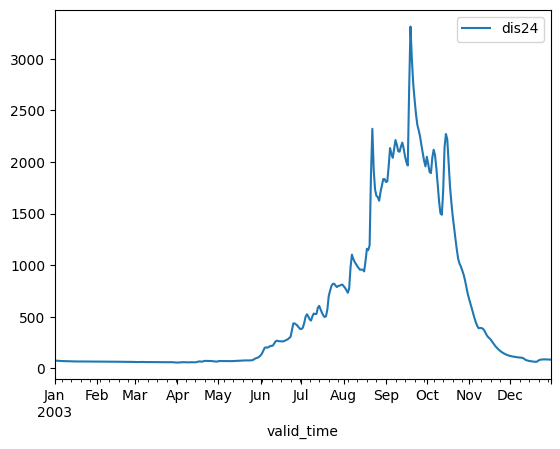

In [13]:
df_rea[df_rea["valid_time"].dt.year == 2003].set_index("valid_time").plot()

In [14]:
df_rea_peaks = (
    df_rea.groupby(df_rea["valid_time"].dt.year)["dis24"].max().reset_index()
)

Plot yearly peaks

<Axes: xlabel='valid_time'>

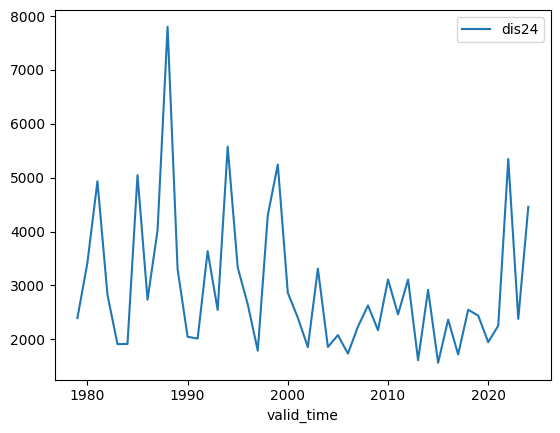

In [15]:
df_rea_peaks.plot(x="valid_time", y="dis24")

In [16]:
df_rea_peaks = calculate_one_group_rp(
    df_rea_peaks, col_name="dis24", ascending=False
)

## Check against reanalysis threshold

We set the threshold to the value for the reanalysis (`3110`).

In [17]:
rp_ra = 5.4

In [18]:
thresh_ra = 3110

In [19]:
# df_rea_peaks["trig"] = df_rea_peaks["dis24_rp"] >= rp_ra
df_rea_peaks["trig"] = df_rea_peaks["dis24"] >= thresh_ra

In [21]:
df_compare = df_rea_peaks.merge(
    df_ref_peaks, suffixes=("_a", "_f"), on="valid_time"
)

Then we iterate over the leadtimes to see the yearly ranking per leadtime.

In [22]:
for lt, group in df_compare.groupby("leadtime"):
    print(lt)
    display(group.sort_values("dis24_rank_f"))

1


,valid_time,dis24_a,dis24_rank_a,dis24_rp_a,trig,leadtime,dis24_f,dis24_rank_f,dis24_rp_f
721,2022,5347.171875,3,15.666667,True,1,4575.291504,1,21.000000
371,2012,3110.078125,15,3.133333,True,1,3142.276611,2,10.500000
294,2010,3109.257812,16,2.937500,False,1,3121.492188,3,7.000000
0,2003,3312.015625,13,3.615385,True,1,2764.023438,4,5.250000
581,2018,2547.906250,23,2.043478,False,1,2593.005371,5,4.200000
210,2008,2627.976562,22,2.136364,False,1,2551.941406,6,3.500000
336,2011,2461.625000,25,1.880000,False,1,2469.128906,7,3.000000
616,2019,2440.054688,26,1.807692,False,1,2394.621826,8,2.625000
511,2016,2364.773438,30,1.566667,False,1,2316.237549,9,2.333333
441,2014,2918.125000,17,2.764706,False,1,2307.178223,10,2.100000


2


,valid_time,dis24_a,dis24_rank_a,dis24_rp_a,trig,leadtime,dis24_f,dis24_rank_f,dis24_rp_f
722,2022,5347.171875,3,15.666667,True,2,4539.672852,1,21.000000
372,2012,3110.078125,15,3.133333,True,2,3098.944580,2,10.500000
295,2010,3109.257812,16,2.937500,False,2,3080.150879,3,7.000000
1,2003,3312.015625,13,3.615385,True,2,2746.835938,4,5.250000
253,2009,2169.906250,33,1.424242,False,2,2719.395996,5,4.200000
617,2019,2440.054688,26,1.807692,False,2,2579.762451,6,3.500000
582,2018,2547.906250,23,2.043478,False,2,2572.190674,7,3.000000
512,2016,2364.773438,30,1.566667,False,2,2537.560059,8,2.625000
169,2007,2235.781250,32,1.468750,False,2,2407.434326,9,2.333333
442,2014,2918.125000,17,2.764706,False,2,2304.465576,10,2.100000


3


,valid_time,dis24_a,dis24_rank_a,dis24_rp_a,trig,leadtime,dis24_f,dis24_rank_f,dis24_rp_f
723,2022,5347.171875,3,15.666667,True,3,4323.481445,1,21.000000
373,2012,3110.078125,15,3.133333,True,3,2951.924316,2,10.500000
296,2010,3109.257812,16,2.937500,False,3,2943.549316,3,7.000000
2,2003,3312.015625,13,3.615385,True,3,2736.531250,4,5.250000
618,2019,2440.054688,26,1.807692,False,3,2509.392090,5,4.200000
254,2009,2169.906250,33,1.424242,False,3,2492.485840,6,3.500000
583,2018,2547.906250,23,2.043478,False,3,2411.555420,7,3.000000
513,2016,2364.773438,30,1.566667,False,3,2404.971924,8,2.625000
443,2014,2918.125000,17,2.764706,False,3,2313.091309,9,2.333333
170,2007,2235.781250,32,1.468750,False,3,2180.134277,10,2.100000


4


,valid_time,dis24_a,dis24_rank_a,dis24_rp_a,trig,leadtime,dis24_f,dis24_rank_f,dis24_rp_f
724,2022,5347.171875,3,15.666667,True,4,4228.503906,1,21.000000
374,2012,3110.078125,15,3.133333,True,4,2883.801514,2,10.500000
297,2010,3109.257812,16,2.937500,False,4,2865.289062,3,7.000000
3,2003,3312.015625,13,3.615385,True,4,2776.615723,4,5.250000
619,2019,2440.054688,26,1.807692,False,4,2654.163330,5,4.200000
584,2018,2547.906250,23,2.043478,False,4,2438.839111,6,3.500000
514,2016,2364.773438,30,1.566667,False,4,2345.894531,7,3.000000
255,2009,2169.906250,33,1.424242,False,4,2307.078857,8,2.625000
444,2014,2918.125000,17,2.764706,False,4,2293.067139,9,2.333333
213,2008,2627.976562,22,2.136364,False,4,2160.913330,10,2.100000


5


,valid_time,dis24_a,dis24_rank_a,dis24_rp_a,trig,leadtime,dis24_f,dis24_rank_f,dis24_rp_f
725,2022,5347.171875,3,15.666667,True,5,4619.898438,1,21.000000
298,2010,3109.257812,16,2.937500,False,5,2840.712402,2,10.500000
375,2012,3110.078125,15,3.133333,True,5,2793.208496,3,7.000000
620,2019,2440.054688,26,1.807692,False,5,2772.688965,4,5.250000
4,2003,3312.015625,13,3.615385,True,5,2735.535889,5,4.200000
445,2014,2918.125000,17,2.764706,False,5,2467.003174,6,3.500000
585,2018,2547.906250,23,2.043478,False,5,2444.964844,7,3.000000
515,2016,2364.773438,30,1.566667,False,5,2343.916504,8,2.625000
214,2008,2627.976562,22,2.136364,False,5,2276.947754,9,2.333333
550,2017,1717.898438,44,1.068182,False,5,2158.274902,10,2.100000


6


,valid_time,dis24_a,dis24_rank_a,dis24_rp_a,trig,leadtime,dis24_f,dis24_rank_f,dis24_rp_f
726,2022,5347.171875,3,15.666667,True,6,5066.170898,1,21.000000
446,2014,2918.125000,17,2.764706,False,6,3250.750000,2,10.500000
5,2003,3312.015625,13,3.615385,True,6,3064.019531,3,7.000000
621,2019,2440.054688,26,1.807692,False,6,2845.327393,4,5.250000
299,2010,3109.257812,16,2.937500,False,6,2808.014160,5,4.200000
516,2016,2364.773438,30,1.566667,False,6,2696.894531,6,3.500000
376,2012,3110.078125,15,3.133333,True,6,2689.899902,7,3.000000
586,2018,2547.906250,23,2.043478,False,6,2399.631348,8,2.625000
131,2006,1733.757812,43,1.093023,False,6,2285.581299,9,2.333333
215,2008,2627.976562,22,2.136364,False,6,2241.678223,10,2.100000


7


,valid_time,dis24_a,dis24_rank_a,dis24_rp_a,trig,leadtime,dis24_f,dis24_rank_f,dis24_rp_f
727,2022,5347.171875,3,15.666667,True,7,5201.161133,1,21.000000
517,2016,2364.773438,30,1.566667,False,7,3309.821045,2,10.500000
447,2014,2918.125000,17,2.764706,False,7,3096.893799,3,7.000000
6,2003,3312.015625,13,3.615385,True,7,3009.303223,4,5.250000
622,2019,2440.054688,26,1.807692,False,7,2808.813965,5,4.200000
300,2010,3109.257812,16,2.937500,False,7,2756.195312,6,3.500000
377,2012,3110.078125,15,3.133333,True,7,2690.712402,7,3.000000
587,2018,2547.906250,23,2.043478,False,7,2382.598389,8,2.625000
216,2008,2627.976562,22,2.136364,False,7,2300.543701,9,2.333333
132,2006,1733.757812,43,1.093023,False,7,2261.504639,10,2.100000


8


,valid_time,dis24_a,dis24_rank_a,dis24_rp_a,trig,leadtime,dis24_f,dis24_rank_f,dis24_rp_f
728,2022,5347.171875,3,15.666667,True,8,5014.899414,1,21.000000
7,2003,3312.015625,13,3.615385,True,8,3513.040527,2,10.500000
518,2016,2364.773438,30,1.566667,False,8,3245.839844,3,7.000000
301,2010,3109.257812,16,2.937500,False,8,2951.446045,4,5.250000
378,2012,3110.078125,15,3.133333,True,8,2878.091309,5,4.200000
448,2014,2918.125000,17,2.764706,False,8,2866.851562,6,3.500000
623,2019,2440.054688,26,1.807692,False,8,2777.289795,7,3.000000
217,2008,2627.976562,22,2.136364,False,8,2516.689941,8,2.625000
588,2018,2547.906250,23,2.043478,False,8,2438.317139,9,2.333333
413,2013,1611.937500,45,1.044444,False,8,2335.428223,10,2.100000


9


,valid_time,dis24_a,dis24_rank_a,dis24_rp_a,trig,leadtime,dis24_f,dis24_rank_f,dis24_rp_f
729,2022,5347.171875,3,15.666667,True,9,5155.020508,1,21.000000
8,2003,3312.015625,13,3.615385,True,9,4168.186035,2,10.500000
519,2016,2364.773438,30,1.566667,False,9,3272.172607,3,7.000000
449,2014,2918.125000,17,2.764706,False,9,3053.992188,4,5.250000
379,2012,3110.078125,15,3.133333,True,9,3002.795410,5,4.200000
302,2010,3109.257812,16,2.937500,False,9,2983.337402,6,3.500000
624,2019,2440.054688,26,1.807692,False,9,2884.680420,7,3.000000
218,2008,2627.976562,22,2.136364,False,9,2855.285889,8,2.625000
414,2013,1611.937500,45,1.044444,False,9,2598.707764,9,2.333333
589,2018,2547.906250,23,2.043478,False,9,2541.093750,10,2.100000


10


,valid_time,dis24_a,dis24_rank_a,dis24_rp_a,trig,leadtime,dis24_f,dis24_rank_f,dis24_rp_f
730,2022,5347.171875,3,15.666667,True,10,5307.136719,1,21.000000
9,2003,3312.015625,13,3.615385,True,10,3884.729736,2,10.500000
450,2014,2918.125000,17,2.764706,False,10,3130.156250,3,7.000000
219,2008,2627.976562,22,2.136364,False,10,3102.133545,4,5.250000
380,2012,3110.078125,15,3.133333,True,10,3046.353027,5,4.200000
520,2016,2364.773438,30,1.566667,False,10,2987.764160,6,3.500000
625,2019,2440.054688,26,1.807692,False,10,2952.456299,7,3.000000
303,2010,3109.257812,16,2.937500,False,10,2949.857910,8,2.625000
590,2018,2547.906250,23,2.043478,False,10,2837.032715,9,2.333333
177,2007,2235.781250,32,1.468750,False,10,2570.506348,10,2.100000


11


,valid_time,dis24_a,dis24_rank_a,dis24_rp_a,trig,leadtime,dis24_f,dis24_rank_f,dis24_rp_f
731,2022,5347.171875,3,15.666667,True,11,5214.659180,1,21.000000
10,2003,3312.015625,13,3.615385,True,11,3656.573486,2,10.500000
626,2019,2440.054688,26,1.807692,False,11,3207.782715,3,7.000000
381,2012,3110.078125,15,3.133333,True,11,3155.737549,4,5.250000
304,2010,3109.257812,16,2.937500,False,11,3005.026611,5,4.200000
451,2014,2918.125000,17,2.764706,False,11,2981.092285,6,3.500000
521,2016,2364.773438,30,1.566667,False,11,2966.846924,7,3.000000
591,2018,2547.906250,23,2.043478,False,11,2845.770264,8,2.625000
220,2008,2627.976562,22,2.136364,False,11,2740.811768,9,2.333333
416,2013,1611.937500,45,1.044444,False,11,2608.250000,10,2.100000


12


,valid_time,dis24_a,dis24_rank_a,dis24_rp_a,trig,leadtime,dis24_f,dis24_rank_f,dis24_rp_f
732,2022,5347.171875,3,15.666667,True,12,4981.093750,1,21.000000
11,2003,3312.015625,13,3.615385,True,12,3436.365723,2,10.500000
627,2019,2440.054688,26,1.807692,False,12,3434.835938,3,7.000000
382,2012,3110.078125,15,3.133333,True,12,3430.692871,4,5.250000
522,2016,2364.773438,30,1.566667,False,12,3130.512451,5,4.200000
305,2010,3109.257812,16,2.937500,False,12,3091.381348,6,3.500000
452,2014,2918.125000,17,2.764706,False,12,2914.449951,7,3.000000
592,2018,2547.906250,23,2.043478,False,12,2847.493652,8,2.625000
417,2013,1611.937500,45,1.044444,False,12,2835.856201,9,2.333333
221,2008,2627.976562,22,2.136364,False,12,2770.804688,10,2.100000


13


,valid_time,dis24_a,dis24_rank_a,dis24_rp_a,trig,leadtime,dis24_f,dis24_rank_f,dis24_rp_f
733,2022,5347.171875,3,15.666667,True,13,4740.189941,1,21.000000
383,2012,3110.078125,15,3.133333,True,13,3616.585938,2,10.500000
628,2019,2440.054688,26,1.807692,False,13,3606.074219,3,7.000000
523,2016,2364.773438,30,1.566667,False,13,3326.977295,4,5.250000
222,2008,2627.976562,22,2.136364,False,13,3310.464844,5,4.200000
12,2003,3312.015625,13,3.615385,True,13,3299.831299,6,3.500000
306,2010,3109.257812,16,2.937500,False,13,3074.898438,7,3.000000
453,2014,2918.125000,17,2.764706,False,13,2910.507812,8,2.625000
593,2018,2547.906250,23,2.043478,False,13,2837.528076,9,2.333333
418,2013,1611.937500,45,1.044444,False,13,2807.521973,10,2.100000


14


,valid_time,dis24_a,dis24_rank_a,dis24_rp_a,trig,leadtime,dis24_f,dis24_rank_f,dis24_rp_f
734,2022,5347.171875,3,15.666667,True,14,4533.800781,1,21.000000
629,2019,2440.054688,26,1.807692,False,14,4206.456055,2,10.500000
13,2003,3312.015625,13,3.615385,True,14,3585.143799,3,7.000000
384,2012,3110.078125,15,3.133333,True,14,3555.796143,4,5.250000
223,2008,2627.976562,22,2.136364,False,14,3372.488281,5,4.200000
524,2016,2364.773438,30,1.566667,False,14,3361.499268,6,3.500000
307,2010,3109.257812,16,2.937500,False,14,3272.597656,7,3.000000
594,2018,2547.906250,23,2.043478,False,14,3150.574219,8,2.625000
454,2014,2918.125000,17,2.764706,False,14,2894.421143,9,2.333333
419,2013,1611.937500,45,1.044444,False,14,2753.554688,10,2.100000


15


,valid_time,dis24_a,dis24_rank_a,dis24_rp_a,trig,leadtime,dis24_f,dis24_rank_f,dis24_rp_f
735,2022,5347.171875,3,15.666667,True,15,4393.790527,1,21.000000
630,2019,2440.054688,26,1.807692,False,15,4276.037598,2,10.500000
14,2003,3312.015625,13,3.615385,True,15,3611.556152,3,7.000000
385,2012,3110.078125,15,3.133333,True,15,3589.854004,4,5.250000
595,2018,2547.906250,23,2.043478,False,15,3478.265625,5,4.200000
308,2010,3109.257812,16,2.937500,False,15,3376.037598,6,3.500000
224,2008,2627.976562,22,2.136364,False,15,3294.430420,7,3.000000
525,2016,2364.773438,30,1.566667,False,15,3213.968018,8,2.625000
455,2014,2918.125000,17,2.764706,False,15,2862.593018,9,2.333333
420,2013,1611.937500,45,1.044444,False,15,2850.926514,10,2.100000


16


,valid_time,dis24_a,dis24_rank_a,dis24_rp_a,trig,leadtime,dis24_f,dis24_rank_f,dis24_rp_f
736,2022,5347.171875,3,15.666667,True,16,4558.833496,1,21.000000
631,2019,2440.054688,26,1.807692,False,16,4280.247070,2,10.500000
386,2012,3110.078125,15,3.133333,True,16,3641.906250,3,7.000000
596,2018,2547.906250,23,2.043478,False,16,3500.192871,4,5.250000
15,2003,3312.015625,13,3.615385,True,16,3435.570312,5,4.200000
309,2010,3109.257812,16,2.937500,False,16,3422.400879,6,3.500000
225,2008,2627.976562,22,2.136364,False,16,3200.137451,7,3.000000
526,2016,2364.773438,30,1.566667,False,16,3093.049316,8,2.625000
456,2014,2918.125000,17,2.764706,False,16,3001.919434,9,2.333333
421,2013,1611.937500,45,1.044444,False,16,2796.359375,10,2.100000


17


,valid_time,dis24_a,dis24_rank_a,dis24_rp_a,trig,leadtime,dis24_f,dis24_rank_f,dis24_rp_f
737,2022,5347.171875,3,15.666667,True,17,4477.049316,1,21.000000
632,2019,2440.054688,26,1.807692,False,17,4235.119629,2,10.500000
387,2012,3110.078125,15,3.133333,True,17,3607.707031,3,7.000000
310,2010,3109.257812,16,2.937500,False,17,3511.781250,4,5.250000
597,2018,2547.906250,23,2.043478,False,17,3384.812500,5,4.200000
16,2003,3312.015625,13,3.615385,True,17,3381.089844,6,3.500000
100,2005,2077.328125,34,1.382353,False,17,3363.745361,7,3.000000
457,2014,2918.125000,17,2.764706,False,17,3126.486816,8,2.625000
226,2008,2627.976562,22,2.136364,False,17,3124.878906,9,2.333333
527,2016,2364.773438,30,1.566667,False,17,3094.968750,10,2.100000


18


,valid_time,dis24_a,dis24_rank_a,dis24_rp_a,trig,leadtime,dis24_f,dis24_rank_f,dis24_rp_f
738,2022,5347.171875,3,15.666667,True,18,4517.747070,1,21.000000
633,2019,2440.054688,26,1.807692,False,18,4221.865723,2,10.500000
311,2010,3109.257812,16,2.937500,False,18,3675.436035,3,7.000000
388,2012,3110.078125,15,3.133333,True,18,3671.963379,4,5.250000
101,2005,2077.328125,34,1.382353,False,18,3565.345215,5,4.200000
598,2018,2547.906250,23,2.043478,False,18,3413.993652,6,3.500000
17,2003,3312.015625,13,3.615385,True,18,3390.378174,7,3.000000
528,2016,2364.773438,30,1.566667,False,18,3209.057129,8,2.625000
227,2008,2627.976562,22,2.136364,False,18,3146.676514,9,2.333333
458,2014,2918.125000,17,2.764706,False,18,3107.274902,10,2.100000


19


,valid_time,dis24_a,dis24_rank_a,dis24_rp_a,trig,leadtime,dis24_f,dis24_rank_f,dis24_rp_f
739,2022,5347.171875,3,15.666667,True,19,4420.122559,1,21.000000
634,2019,2440.054688,26,1.807692,False,19,4152.004883,2,10.500000
389,2012,3110.078125,15,3.133333,True,19,3962.628906,3,7.000000
18,2003,3312.015625,13,3.615385,True,19,3741.350098,4,5.250000
312,2010,3109.257812,16,2.937500,False,19,3498.435059,5,4.200000
529,2016,2364.773438,30,1.566667,False,19,3443.883545,6,3.500000
102,2005,2077.328125,34,1.382353,False,19,3313.789795,7,3.000000
599,2018,2547.906250,23,2.043478,False,19,3276.764160,8,2.625000
228,2008,2627.976562,22,2.136364,False,19,3195.050049,9,2.333333
459,2014,2918.125000,17,2.764706,False,19,3104.677246,10,2.100000


20


,valid_time,dis24_a,dis24_rank_a,dis24_rp_a,trig,leadtime,dis24_f,dis24_rank_f,dis24_rp_f
740,2022,5347.171875,3,15.666667,True,20,4370.446777,1,21.000000
635,2019,2440.054688,26,1.807692,False,20,4100.204590,2,10.500000
390,2012,3110.078125,15,3.133333,True,20,4093.915527,3,7.000000
19,2003,3312.015625,13,3.615385,True,20,3633.509277,4,5.250000
313,2010,3109.257812,16,2.937500,False,20,3560.328125,5,4.200000
530,2016,2364.773438,30,1.566667,False,20,3476.871826,6,3.500000
600,2018,2547.906250,23,2.043478,False,20,3443.896973,7,3.000000
103,2005,2077.328125,34,1.382353,False,20,3430.406250,8,2.625000
460,2014,2918.125000,17,2.764706,False,20,3150.381348,9,2.333333
229,2008,2627.976562,22,2.136364,False,20,3040.161621,10,2.100000


21


,valid_time,dis24_a,dis24_rank_a,dis24_rp_a,trig,leadtime,dis24_f,dis24_rank_f,dis24_rp_f
741,2022,5347.171875,3,15.666667,True,21,4492.153809,1,21.000000
636,2019,2440.054688,26,1.807692,False,21,4074.775879,2,10.500000
391,2012,3110.078125,15,3.133333,True,21,3963.624268,3,7.000000
601,2018,2547.906250,23,2.043478,False,21,3721.829590,4,5.250000
20,2003,3312.015625,13,3.615385,True,21,3619.495361,5,4.200000
314,2010,3109.257812,16,2.937500,False,21,3598.410156,6,3.500000
104,2005,2077.328125,34,1.382353,False,21,3517.120361,7,3.000000
531,2016,2364.773438,30,1.566667,False,21,3391.388184,8,2.625000
230,2008,2627.976562,22,2.136364,False,21,3324.677246,9,2.333333
461,2014,2918.125000,17,2.764706,False,21,3181.980469,10,2.100000


22


,valid_time,dis24_a,dis24_rank_a,dis24_rp_a,trig,leadtime,dis24_f,dis24_rank_f,dis24_rp_f
742,2022,5347.171875,3,15.666667,True,22,4578.864746,1,21.000000
231,2008,2627.976562,22,2.136364,False,22,4379.755371,2,10.500000
637,2019,2440.054688,26,1.807692,False,22,4052.706299,3,7.000000
392,2012,3110.078125,15,3.133333,True,22,3939.905518,4,5.250000
21,2003,3312.015625,13,3.615385,True,22,3930.385254,5,4.200000
315,2010,3109.257812,16,2.937500,False,22,3689.212402,6,3.500000
602,2018,2547.906250,23,2.043478,False,22,3508.798340,7,3.000000
532,2016,2364.773438,30,1.566667,False,22,3426.333496,8,2.625000
105,2005,2077.328125,34,1.382353,False,22,3389.492188,9,2.333333
462,2014,2918.125000,17,2.764706,False,22,3168.637451,10,2.100000


23


,valid_time,dis24_a,dis24_rank_a,dis24_rp_a,trig,leadtime,dis24_f,dis24_rank_f,dis24_rp_f
743,2022,5347.171875,3,15.666667,True,23,4536.802246,1,21.000000
232,2008,2627.976562,22,2.136364,False,23,4330.622070,2,10.500000
22,2003,3312.015625,13,3.615385,True,23,4284.916992,3,7.000000
638,2019,2440.054688,26,1.807692,False,23,3917.177246,4,5.250000
316,2010,3109.257812,16,2.937500,False,23,3745.367920,5,4.200000
393,2012,3110.078125,15,3.133333,True,23,3744.360107,6,3.500000
428,2013,1611.937500,45,1.044444,False,23,3551.530518,7,3.000000
533,2016,2364.773438,30,1.566667,False,23,3462.914795,8,2.625000
463,2014,2918.125000,17,2.764706,False,23,3448.817871,9,2.333333
603,2018,2547.906250,23,2.043478,False,23,3402.272705,10,2.100000


24


,valid_time,dis24_a,dis24_rank_a,dis24_rp_a,trig,leadtime,dis24_f,dis24_rank_f,dis24_rp_f
744,2022,5347.171875,3,15.666667,True,24,4453.713379,1,21.000000
23,2003,3312.015625,13,3.615385,True,24,4149.338379,2,10.500000
233,2008,2627.976562,22,2.136364,False,24,3861.968750,3,7.000000
639,2019,2440.054688,26,1.807692,False,24,3781.874268,4,5.250000
317,2010,3109.257812,16,2.937500,False,24,3774.731201,5,4.200000
464,2014,2918.125000,17,2.764706,False,24,3685.377441,6,3.500000
394,2012,3110.078125,15,3.133333,True,24,3589.878906,7,3.000000
429,2013,1611.937500,45,1.044444,False,24,3524.903076,8,2.625000
604,2018,2547.906250,23,2.043478,False,24,3507.772705,9,2.333333
534,2016,2364.773438,30,1.566667,False,24,3380.539062,10,2.100000


25


,valid_time,dis24_a,dis24_rank_a,dis24_rp_a,trig,leadtime,dis24_f,dis24_rank_f,dis24_rp_f
745,2022,5347.171875,3,15.666667,True,25,4283.742188,1,21.000000
640,2019,2440.054688,26,1.807692,False,25,3908.020264,2,10.500000
318,2010,3109.257812,16,2.937500,False,25,3777.850830,3,7.000000
395,2012,3110.078125,15,3.133333,True,25,3771.497559,4,5.250000
24,2003,3312.015625,13,3.615385,True,25,3712.468018,5,4.200000
605,2018,2547.906250,23,2.043478,False,25,3641.899170,6,3.500000
234,2008,2627.976562,22,2.136364,False,25,3540.319580,7,3.000000
535,2016,2364.773438,30,1.566667,False,25,3405.951660,8,2.625000
430,2013,1611.937500,45,1.044444,False,25,3343.114014,9,2.333333
570,2017,1717.898438,44,1.068182,False,25,3310.581299,10,2.100000


26


,valid_time,dis24_a,dis24_rank_a,dis24_rp_a,trig,leadtime,dis24_f,dis24_rank_f,dis24_rp_f
746,2022,5347.171875,3,15.666667,True,26,4140.292969,1,21.000000
396,2012,3110.078125,15,3.133333,True,26,3879.563965,2,10.500000
641,2019,2440.054688,26,1.807692,False,26,3853.460938,3,7.000000
319,2010,3109.257812,16,2.937500,False,26,3770.065674,4,5.250000
606,2018,2547.906250,23,2.043478,False,26,3641.786621,5,4.200000
536,2016,2364.773438,30,1.566667,False,26,3625.705566,6,3.500000
25,2003,3312.015625,13,3.615385,True,26,3418.561768,7,3.000000
235,2008,2627.976562,22,2.136364,False,26,3309.889893,8,2.625000
431,2013,1611.937500,45,1.044444,False,26,3290.109375,9,2.333333
466,2014,2918.125000,17,2.764706,False,26,3249.191406,10,2.100000


27


,valid_time,dis24_a,dis24_rank_a,dis24_rp_a,trig,leadtime,dis24_f,dis24_rank_f,dis24_rp_f
747,2022,5347.171875,3,15.666667,True,27,4093.909424,1,21.000000
362,2011,2461.625000,25,1.880000,False,27,3934.178223,2,10.500000
397,2012,3110.078125,15,3.133333,True,27,3896.044434,3,7.000000
642,2019,2440.054688,26,1.807692,False,27,3828.156982,4,5.250000
320,2010,3109.257812,16,2.937500,False,27,3820.162598,5,4.200000
236,2008,2627.976562,22,2.136364,False,27,3645.868652,6,3.500000
537,2016,2364.773438,30,1.566667,False,27,3571.320312,7,3.000000
607,2018,2547.906250,23,2.043478,False,27,3468.980469,8,2.625000
467,2014,2918.125000,17,2.764706,False,27,3463.026611,9,2.333333
432,2013,1611.937500,45,1.044444,False,27,3403.666504,10,2.100000


28


,valid_time,dis24_a,dis24_rank_a,dis24_rp_a,trig,leadtime,dis24_f,dis24_rank_f,dis24_rp_f
748,2022,5347.171875,3,15.666667,True,28,3985.445312,1,21.000000
398,2012,3110.078125,15,3.133333,True,28,3934.264893,2,10.500000
321,2010,3109.257812,16,2.937500,False,28,3925.173340,3,7.000000
237,2008,2627.976562,22,2.136364,False,28,3890.645264,4,5.250000
643,2019,2440.054688,26,1.807692,False,28,3877.450684,5,4.200000
468,2014,2918.125000,17,2.764706,False,28,3527.160156,6,3.500000
538,2016,2364.773438,30,1.566667,False,28,3518.861816,7,3.000000
27,2003,3312.015625,13,3.615385,True,28,3401.025879,8,2.625000
608,2018,2547.906250,23,2.043478,False,28,3367.860107,9,2.333333
69,2004,1856.578125,40,1.175000,False,28,3293.934326,10,2.100000


29


,valid_time,dis24_a,dis24_rank_a,dis24_rp_a,trig,leadtime,dis24_f,dis24_rank_f,dis24_rp_f
399,2012,3110.078125,15,3.133333,True,29,4048.225098,1,21.000000
322,2010,3109.257812,16,2.937500,False,29,4027.287598,2,10.500000
469,2014,2918.125000,17,2.764706,False,29,3928.940674,3,7.000000
644,2019,2440.054688,26,1.807692,False,29,3904.488281,4,5.250000
749,2022,5347.171875,3,15.666667,True,29,3839.026611,5,4.200000
238,2008,2627.976562,22,2.136364,False,29,3801.782715,6,3.500000
539,2016,2364.773438,30,1.566667,False,29,3563.020996,7,3.000000
28,2003,3312.015625,13,3.615385,True,29,3437.060059,8,2.625000
609,2018,2547.906250,23,2.043478,False,29,3357.304688,9,2.333333
70,2004,1856.578125,40,1.175000,False,29,3186.828857,10,2.100000


30


,valid_time,dis24_a,dis24_rank_a,dis24_rp_a,trig,leadtime,dis24_f,dis24_rank_f,dis24_rp_f
470,2014,2918.125000,17,2.764706,False,30,4150.502930,1,21.000000
400,2012,3110.078125,15,3.133333,True,30,4021.522705,2,10.500000
645,2019,2440.054688,26,1.807692,False,30,3942.508545,3,7.000000
323,2010,3109.257812,16,2.937500,False,30,3877.691406,4,5.250000
750,2022,5347.171875,3,15.666667,True,30,3739.416504,5,4.200000
239,2008,2627.976562,22,2.136364,False,30,3618.568848,6,3.500000
575,2017,1717.898438,44,1.068182,False,30,3562.528076,7,3.000000
29,2003,3312.015625,13,3.615385,True,30,3463.569580,8,2.625000
610,2018,2547.906250,23,2.043478,False,30,3443.538330,9,2.333333
540,2016,2364.773438,30,1.566667,False,30,3349.985107,10,2.100000


31


,valid_time,dis24_a,dis24_rank_a,dis24_rp_a,trig,leadtime,dis24_f,dis24_rank_f,dis24_rp_f
646,2019,2440.054688,26,1.807692,False,31,3932.394531,1,21.000000
401,2012,3110.078125,15,3.133333,True,31,3880.268066,2,10.500000
471,2014,2918.125000,17,2.764706,False,31,3808.074951,3,7.000000
324,2010,3109.257812,16,2.937500,False,31,3789.804688,4,5.250000
751,2022,5347.171875,3,15.666667,True,31,3784.900879,5,4.200000
240,2008,2627.976562,22,2.136364,False,31,3552.013184,6,3.500000
30,2003,3312.015625,13,3.615385,True,31,3544.177246,7,3.000000
611,2018,2547.906250,23,2.043478,False,31,3519.649170,8,2.625000
541,2016,2364.773438,30,1.566667,False,31,3423.302246,9,2.333333
436,2013,1611.937500,45,1.044444,False,31,3204.489014,10,2.100000


32


,valid_time,dis24_a,dis24_rank_a,dis24_rp_a,trig,leadtime,dis24_f,dis24_rank_f,dis24_rp_f
241,2008,2627.976562,22,2.136364,False,32,4070.671875,1,21.000000
542,2016,2364.773438,30,1.566667,False,32,3955.625732,2,10.500000
647,2019,2440.054688,26,1.807692,False,32,3859.205566,3,7.000000
325,2010,3109.257812,16,2.937500,False,32,3834.338379,4,5.250000
752,2022,5347.171875,3,15.666667,True,32,3783.520264,5,4.200000
402,2012,3110.078125,15,3.133333,True,32,3744.069580,6,3.500000
472,2014,2918.125000,17,2.764706,False,32,3626.052246,7,3.000000
31,2003,3312.015625,13,3.615385,True,32,3519.138184,8,2.625000
612,2018,2547.906250,23,2.043478,False,32,3500.781250,9,2.333333
115,2005,2077.328125,34,1.382353,False,32,3183.196045,10,2.100000


33


,valid_time,dis24_a,dis24_rank_a,dis24_rp_a,trig,leadtime,dis24_f,dis24_rank_f,dis24_rp_f
326,2010,3109.257812,16,2.937500,False,33,3945.163330,1,21.000000
648,2019,2440.054688,26,1.807692,False,33,3925.030518,2,10.500000
242,2008,2627.976562,22,2.136364,False,33,3924.292969,3,7.000000
543,2016,2364.773438,30,1.566667,False,33,3910.492920,4,5.250000
753,2022,5347.171875,3,15.666667,True,33,3687.346924,5,4.200000
473,2014,2918.125000,17,2.764706,False,33,3667.208496,6,3.500000
32,2003,3312.015625,13,3.615385,True,33,3663.242188,7,3.000000
403,2012,3110.078125,15,3.133333,True,33,3536.741455,8,2.625000
613,2018,2547.906250,23,2.043478,False,33,3457.546143,9,2.333333
116,2005,2077.328125,34,1.382353,False,33,3302.046875,10,2.100000


34


,valid_time,dis24_a,dis24_rank_a,dis24_rp_a,trig,leadtime,dis24_f,dis24_rank_f,dis24_rp_f
649,2019,2440.054688,26,1.807692,False,34,4059.247559,1,21.000000
327,2010,3109.257812,16,2.937500,False,34,3905.524170,2,10.500000
754,2022,5347.171875,3,15.666667,True,34,3771.990723,3,7.000000
33,2003,3312.015625,13,3.615385,True,34,3737.312500,4,5.250000
544,2016,2364.773438,30,1.566667,False,34,3688.754639,5,4.200000
474,2014,2918.125000,17,2.764706,False,34,3609.024902,6,3.500000
243,2008,2627.976562,22,2.136364,False,34,3609.014893,7,3.000000
614,2018,2547.906250,23,2.043478,False,34,3564.781982,8,2.625000
404,2012,3110.078125,15,3.133333,True,34,3483.459473,9,2.333333
117,2005,2077.328125,34,1.382353,False,34,3252.586670,10,2.100000


35


,valid_time,dis24_a,dis24_rank_a,dis24_rp_a,trig,leadtime,dis24_f,dis24_rank_f,dis24_rp_f
650,2019,2440.054688,26,1.807692,False,35,4437.524414,1,21.000000
328,2010,3109.257812,16,2.937500,False,35,3991.835938,2,10.500000
755,2022,5347.171875,3,15.666667,True,35,3867.678223,3,7.000000
34,2003,3312.015625,13,3.615385,True,35,3612.358643,4,5.250000
615,2018,2547.906250,23,2.043478,False,35,3593.543701,5,4.200000
244,2008,2627.976562,22,2.136364,False,35,3550.981934,6,3.500000
545,2016,2364.773438,30,1.566667,False,35,3548.710205,7,3.000000
475,2014,2918.125000,17,2.764706,False,35,3441.622559,8,2.625000
405,2012,3110.078125,15,3.133333,True,35,3406.726562,9,2.333333
76,2004,1856.578125,40,1.175000,False,35,3271.111816,10,2.100000


36


,valid_time,dis24_a,dis24_rank_a,dis24_rp_a,trig,leadtime,dis24_f,dis24_rank_f,dis24_rp_f
329,2010,3109.257812,16,2.937500,False,36,4177.506836,1,9.000000
245,2008,2627.976562,22,2.136364,False,36,3510.461670,2,4.500000
35,2003,3312.015625,13,3.615385,True,36,3509.448486,3,3.000000
119,2005,2077.328125,34,1.382353,False,36,3425.996826,4,2.250000
77,2004,1856.578125,40,1.175000,False,36,3185.824219,5,1.800000
203,2007,2235.781250,32,1.468750,False,36,2866.588379,6,1.500000
161,2006,1733.757812,43,1.093023,False,36,2699.492188,7,1.285714
287,2009,2169.906250,33,1.424242,False,36,2269.705566,8,1.125000


37


,valid_time,dis24_a,dis24_rank_a,dis24_rp_a,trig,leadtime,dis24_f,dis24_rank_f,dis24_rp_f
330,2010,3109.257812,16,2.937500,False,37,4699.467285,1,9.000000
246,2008,2627.976562,22,2.136364,False,37,3563.283691,2,4.500000
120,2005,2077.328125,34,1.382353,False,37,3442.934326,3,3.000000
36,2003,3312.015625,13,3.615385,True,37,3417.479004,4,2.250000
78,2004,1856.578125,40,1.175000,False,37,3174.221191,5,1.800000
204,2007,2235.781250,32,1.468750,False,37,2800.255371,6,1.500000
162,2006,1733.757812,43,1.093023,False,37,2697.184326,7,1.285714
288,2009,2169.906250,33,1.424242,False,37,2255.340576,8,1.125000


38


,valid_time,dis24_a,dis24_rank_a,dis24_rp_a,trig,leadtime,dis24_f,dis24_rank_f,dis24_rp_f
331,2010,3109.257812,16,2.937500,False,38,4416.780273,1,9.000000
247,2008,2627.976562,22,2.136364,False,38,3521.183594,2,4.500000
121,2005,2077.328125,34,1.382353,False,38,3417.387451,3,3.000000
37,2003,3312.015625,13,3.615385,True,38,3364.907715,4,2.250000
79,2004,1856.578125,40,1.175000,False,38,3278.721191,5,1.800000
205,2007,2235.781250,32,1.468750,False,38,2836.917236,6,1.500000
163,2006,1733.757812,43,1.093023,False,38,2741.772705,7,1.285714
289,2009,2169.906250,33,1.424242,False,38,2377.106201,8,1.125000


39


,valid_time,dis24_a,dis24_rank_a,dis24_rp_a,trig,leadtime,dis24_f,dis24_rank_f,dis24_rp_f
332,2010,3109.257812,16,2.937500,False,39,3994.853027,1,9.000000
80,2004,1856.578125,40,1.175000,False,39,3378.862549,2,4.500000
248,2008,2627.976562,22,2.136364,False,39,3376.468750,3,3.000000
38,2003,3312.015625,13,3.615385,True,39,3372.850830,4,2.250000
122,2005,2077.328125,34,1.382353,False,39,3365.630371,5,1.800000
206,2007,2235.781250,32,1.468750,False,39,3013.553955,6,1.500000
164,2006,1733.757812,43,1.093023,False,39,2736.334473,7,1.285714
290,2009,2169.906250,33,1.424242,False,39,2300.200684,8,1.125000


40


,valid_time,dis24_a,dis24_rank_a,dis24_rp_a,trig,leadtime,dis24_f,dis24_rank_f,dis24_rp_f
333,2010,3109.257812,16,2.937500,False,40,3809.422607,1,9.000000
81,2004,1856.578125,40,1.175000,False,40,3550.807861,2,4.500000
39,2003,3312.015625,13,3.615385,True,40,3442.367920,3,3.000000
249,2008,2627.976562,22,2.136364,False,40,3318.457764,4,2.250000
123,2005,2077.328125,34,1.382353,False,40,3227.102295,5,1.800000
207,2007,2235.781250,32,1.468750,False,40,3041.921875,6,1.500000
165,2006,1733.757812,43,1.093023,False,40,2773.599121,7,1.285714
291,2009,2169.906250,33,1.424242,False,40,2351.075684,8,1.125000


41


,valid_time,dis24_a,dis24_rank_a,dis24_rp_a,trig,leadtime,dis24_f,dis24_rank_f,dis24_rp_f
334,2010,3109.257812,16,2.937500,False,41,3991.477295,1,9.000000
82,2004,1856.578125,40,1.175000,False,41,3551.360840,2,4.500000
40,2003,3312.015625,13,3.615385,True,41,3509.097656,3,3.000000
250,2008,2627.976562,22,2.136364,False,41,3256.527344,4,2.250000
208,2007,2235.781250,32,1.468750,False,41,3204.831299,5,1.800000
124,2005,2077.328125,34,1.382353,False,41,3062.757812,6,1.500000
166,2006,1733.757812,43,1.093023,False,41,2723.219482,7,1.285714
292,2009,2169.906250,33,1.424242,False,41,2398.000000,8,1.125000


42


,valid_time,dis24_a,dis24_rank_a,dis24_rp_a,trig,leadtime,dis24_f,dis24_rank_f,dis24_rp_f
335,2010,3109.257812,16,2.937500,False,42,3933.841309,1,9.000000
41,2003,3312.015625,13,3.615385,True,42,3510.442139,2,4.500000
83,2004,1856.578125,40,1.175000,False,42,3416.114014,3,3.000000
251,2008,2627.976562,22,2.136364,False,42,3217.433594,4,2.250000
209,2007,2235.781250,32,1.468750,False,42,3214.589844,5,1.800000
125,2005,2077.328125,34,1.382353,False,42,2987.020996,6,1.500000
167,2006,1733.757812,43,1.093023,False,42,2684.509277,7,1.285714
293,2009,2169.906250,33,1.424242,False,42,2368.220215,8,1.125000


Looks like we can go up to a leadtime of `5` before we have a year that would have triggered (i.e. is above `3110`) that is NOT on the list of years that would have triggered with the reanalysis. Let's just verify that:

In [23]:
lt_max = 5
thresh_ref = 3130
df_compare[
    (df_compare["dis24_f"] >= thresh_ref) & (df_compare["leadtime"] <= lt_max)
]

,valid_time,dis24_a,dis24_rank_a,dis24_rp_a,trig,leadtime,dis24_f,dis24_rank_f,dis24_rp_f
371,2012,3110.078125,15,3.133333,True,1,3142.276611,2,10.5
721,2022,5347.171875,3,15.666667,True,1,4575.291504,1,21.0
722,2022,5347.171875,3,15.666667,True,2,4539.672852,1,21.0
723,2022,5347.171875,3,15.666667,True,3,4323.481445,1,21.0
724,2022,5347.171875,3,15.666667,True,4,4228.503906,1,21.0
725,2022,5347.171875,3,15.666667,True,5,4619.898438,1,21.0


In [41]:
df_ref["issued_time"] = df_ref["valid_time"] - df_ref["leadtime"].apply(
    lambda x: pd.Timedelta(days=x - 1)
)

In [45]:
df_ref_trig = df_ref[
    (df_ref["dis24"] >= thresh_ref) & (df_ref["leadtime"] <= lt_max)
]

In [55]:
df_ref["issued_time"].unique()

<DatetimeArray>
['2003-07-04 00:00:00', '2003-07-07 00:00:00', '2003-07-11 00:00:00',
 '2003-07-14 00:00:00', '2003-07-18 00:00:00', '2003-07-21 00:00:00',
 '2003-07-25 00:00:00', '2003-07-28 00:00:00', '2003-08-01 00:00:00',
 '2003-08-04 00:00:00',
 ...
 '2022-09-29 00:00:00', '2022-10-03 00:00:00', '2022-10-06 00:00:00',
 '2022-10-10 00:00:00', '2022-10-13 00:00:00', '2022-10-17 00:00:00',
 '2022-10-20 00:00:00', '2022-10-24 00:00:00', '2022-10-27 00:00:00',
 '2022-10-31 00:00:00']
Length: 700, dtype: datetime64[ns]

In [53]:
df_ref_trig.sort_values(["issued_time", "valid_time"])

,valid_time,leadtime,dis24,issued_time
13320,2012-08-22,1,3142.276611,2012-08-22
25570,2022-08-22,1,3171.425049,2022-08-22
25670,2022-09-01,1,3667.960938,2022-09-01
25680,2022-09-02,2,4539.672852,2022-09-01
25690,2022-09-03,3,4323.481445,2022-09-01
25700,2022-09-04,4,4228.503906,2022-09-01
25711,2022-09-05,5,3864.475098,2022-09-01
25770,2022-09-11,4,3284.663330,2022-09-08
25781,2022-09-12,5,3523.425781,2022-09-08
25780,2022-09-12,1,3747.796875,2022-09-12


In [51]:
df_ref_trig.loc[
    df_ref_trig.groupby(df_ref_trig["valid_time"].dt.year)[
        "issued_time"
    ].idxmin()
]

,valid_time,leadtime,dis24,issued_time
13320,2012-08-22,1,3142.276611,2012-08-22
25570,2022-08-22,1,3171.425049,2022-08-22


Now we can actually do this more programatically. For each maximum leadtime, we can check what is:

- the maximum possible value we can set the trigger to without excluding any years we should have triggered for (confusingly set as `min_true` in the code below)
- the minimum possible value we can set the trigger to without falsely triggering for any years (confusingly set as `max_false` in the code below)

In [61]:
dicts = []
for lt_max in df_compare["leadtime"].unique():
    print(lt_max)
    dff = df_compare[df_compare["leadtime"] <= lt_max]
    max_false_value = dff[~dff["trig"]]["dis24_f"].max()
    min_true_value = dff[dff["trig"] & (dff["dis24_f"] >= max_false_value)][
        "dis24_f"
    ].min()
    n_trig_years = dff[dff["dis24_f"] > max_false_value][
        "valid_time"
    ].nunique()
    display(
        dff[dff["dis24_f"] >= max_false_value].sort_values(
            "dis24_f", ascending=False
        )
    )
    dicts.append(
        {
            "lt_max": lt_max,
            "min_true": min_true_value,
            "max_false": max_false_value,
            "n_trig": n_trig_years,
        }
    )

df_threshs = pd.DataFrame(dicts)

1


,valid_time,dis24_a,dis24_rank_a,dis24_rp_a,trig,leadtime,dis24_f,dis24_rank_f,dis24_rp_f
721,2022,5347.171875,3,15.666667,True,1,4575.291504,1,21.0
371,2012,3110.078125,15,3.133333,True,1,3142.276611,2,10.5
294,2010,3109.257812,16,2.937500,False,1,3121.492188,3,7.0


2


,valid_time,dis24_a,dis24_rank_a,dis24_rp_a,trig,leadtime,dis24_f,dis24_rank_f,dis24_rp_f
721,2022,5347.171875,3,15.666667,True,1,4575.291504,1,21.0
722,2022,5347.171875,3,15.666667,True,2,4539.672852,1,21.0
371,2012,3110.078125,15,3.133333,True,1,3142.276611,2,10.5
294,2010,3109.257812,16,2.937500,False,1,3121.492188,3,7.0


3


,valid_time,dis24_a,dis24_rank_a,dis24_rp_a,trig,leadtime,dis24_f,dis24_rank_f,dis24_rp_f
721,2022,5347.171875,3,15.666667,True,1,4575.291504,1,21.0
722,2022,5347.171875,3,15.666667,True,2,4539.672852,1,21.0
723,2022,5347.171875,3,15.666667,True,3,4323.481445,1,21.0
371,2012,3110.078125,15,3.133333,True,1,3142.276611,2,10.5
294,2010,3109.257812,16,2.937500,False,1,3121.492188,3,7.0


4


,valid_time,dis24_a,dis24_rank_a,dis24_rp_a,trig,leadtime,dis24_f,dis24_rank_f,dis24_rp_f
721,2022,5347.171875,3,15.666667,True,1,4575.291504,1,21.0
722,2022,5347.171875,3,15.666667,True,2,4539.672852,1,21.0
723,2022,5347.171875,3,15.666667,True,3,4323.481445,1,21.0
724,2022,5347.171875,3,15.666667,True,4,4228.503906,1,21.0
371,2012,3110.078125,15,3.133333,True,1,3142.276611,2,10.5
294,2010,3109.257812,16,2.937500,False,1,3121.492188,3,7.0


5


,valid_time,dis24_a,dis24_rank_a,dis24_rp_a,trig,leadtime,dis24_f,dis24_rank_f,dis24_rp_f
725,2022,5347.171875,3,15.666667,True,5,4619.898438,1,21.0
721,2022,5347.171875,3,15.666667,True,1,4575.291504,1,21.0
722,2022,5347.171875,3,15.666667,True,2,4539.672852,1,21.0
723,2022,5347.171875,3,15.666667,True,3,4323.481445,1,21.0
724,2022,5347.171875,3,15.666667,True,4,4228.503906,1,21.0
371,2012,3110.078125,15,3.133333,True,1,3142.276611,2,10.5
294,2010,3109.257812,16,2.937500,False,1,3121.492188,3,7.0


6


,valid_time,dis24_a,dis24_rank_a,dis24_rp_a,trig,leadtime,dis24_f,dis24_rank_f,dis24_rp_f
726,2022,5347.171875,3,15.666667,True,6,5066.170898,1,21.0
725,2022,5347.171875,3,15.666667,True,5,4619.898438,1,21.0
721,2022,5347.171875,3,15.666667,True,1,4575.291504,1,21.0
722,2022,5347.171875,3,15.666667,True,2,4539.672852,1,21.0
723,2022,5347.171875,3,15.666667,True,3,4323.481445,1,21.0
724,2022,5347.171875,3,15.666667,True,4,4228.503906,1,21.0
446,2014,2918.125000,17,2.764706,False,6,3250.750000,2,10.5


7


,valid_time,dis24_a,dis24_rank_a,dis24_rp_a,trig,leadtime,dis24_f,dis24_rank_f,dis24_rp_f
727,2022,5347.171875,3,15.666667,True,7,5201.161133,1,21.0
726,2022,5347.171875,3,15.666667,True,6,5066.170898,1,21.0
725,2022,5347.171875,3,15.666667,True,5,4619.898438,1,21.0
721,2022,5347.171875,3,15.666667,True,1,4575.291504,1,21.0
722,2022,5347.171875,3,15.666667,True,2,4539.672852,1,21.0
723,2022,5347.171875,3,15.666667,True,3,4323.481445,1,21.0
724,2022,5347.171875,3,15.666667,True,4,4228.503906,1,21.0
517,2016,2364.773438,30,1.566667,False,7,3309.821045,2,10.5


8


,valid_time,dis24_a,dis24_rank_a,dis24_rp_a,trig,leadtime,dis24_f,dis24_rank_f,dis24_rp_f
727,2022,5347.171875,3,15.666667,True,7,5201.161133,1,21.0
726,2022,5347.171875,3,15.666667,True,6,5066.170898,1,21.0
728,2022,5347.171875,3,15.666667,True,8,5014.899414,1,21.0
725,2022,5347.171875,3,15.666667,True,5,4619.898438,1,21.0
721,2022,5347.171875,3,15.666667,True,1,4575.291504,1,21.0
722,2022,5347.171875,3,15.666667,True,2,4539.672852,1,21.0
723,2022,5347.171875,3,15.666667,True,3,4323.481445,1,21.0
724,2022,5347.171875,3,15.666667,True,4,4228.503906,1,21.0
7,2003,3312.015625,13,3.615385,True,8,3513.040527,2,10.5
517,2016,2364.773438,30,1.566667,False,7,3309.821045,2,10.5


9


,valid_time,dis24_a,dis24_rank_a,dis24_rp_a,trig,leadtime,dis24_f,dis24_rank_f,dis24_rp_f
727,2022,5347.171875,3,15.666667,True,7,5201.161133,1,21.0
729,2022,5347.171875,3,15.666667,True,9,5155.020508,1,21.0
726,2022,5347.171875,3,15.666667,True,6,5066.170898,1,21.0
728,2022,5347.171875,3,15.666667,True,8,5014.899414,1,21.0
725,2022,5347.171875,3,15.666667,True,5,4619.898438,1,21.0
721,2022,5347.171875,3,15.666667,True,1,4575.291504,1,21.0
722,2022,5347.171875,3,15.666667,True,2,4539.672852,1,21.0
723,2022,5347.171875,3,15.666667,True,3,4323.481445,1,21.0
724,2022,5347.171875,3,15.666667,True,4,4228.503906,1,21.0
8,2003,3312.015625,13,3.615385,True,9,4168.186035,2,10.5


10


,valid_time,dis24_a,dis24_rank_a,dis24_rp_a,trig,leadtime,dis24_f,dis24_rank_f,dis24_rp_f
730,2022,5347.171875,3,15.666667,True,10,5307.136719,1,21.0
727,2022,5347.171875,3,15.666667,True,7,5201.161133,1,21.0
729,2022,5347.171875,3,15.666667,True,9,5155.020508,1,21.0
726,2022,5347.171875,3,15.666667,True,6,5066.170898,1,21.0
728,2022,5347.171875,3,15.666667,True,8,5014.899414,1,21.0
725,2022,5347.171875,3,15.666667,True,5,4619.898438,1,21.0
721,2022,5347.171875,3,15.666667,True,1,4575.291504,1,21.0
722,2022,5347.171875,3,15.666667,True,2,4539.672852,1,21.0
723,2022,5347.171875,3,15.666667,True,3,4323.481445,1,21.0
724,2022,5347.171875,3,15.666667,True,4,4228.503906,1,21.0


11


,valid_time,dis24_a,dis24_rank_a,dis24_rp_a,trig,leadtime,dis24_f,dis24_rank_f,dis24_rp_f
730,2022,5347.171875,3,15.666667,True,10,5307.136719,1,21.0
731,2022,5347.171875,3,15.666667,True,11,5214.659180,1,21.0
727,2022,5347.171875,3,15.666667,True,7,5201.161133,1,21.0
729,2022,5347.171875,3,15.666667,True,9,5155.020508,1,21.0
726,2022,5347.171875,3,15.666667,True,6,5066.170898,1,21.0
728,2022,5347.171875,3,15.666667,True,8,5014.899414,1,21.0
725,2022,5347.171875,3,15.666667,True,5,4619.898438,1,21.0
721,2022,5347.171875,3,15.666667,True,1,4575.291504,1,21.0
722,2022,5347.171875,3,15.666667,True,2,4539.672852,1,21.0
723,2022,5347.171875,3,15.666667,True,3,4323.481445,1,21.0


12


,valid_time,dis24_a,dis24_rank_a,dis24_rp_a,trig,leadtime,dis24_f,dis24_rank_f,dis24_rp_f
730,2022,5347.171875,3,15.666667,True,10,5307.136719,1,21.0
731,2022,5347.171875,3,15.666667,True,11,5214.659180,1,21.0
727,2022,5347.171875,3,15.666667,True,7,5201.161133,1,21.0
729,2022,5347.171875,3,15.666667,True,9,5155.020508,1,21.0
726,2022,5347.171875,3,15.666667,True,6,5066.170898,1,21.0
728,2022,5347.171875,3,15.666667,True,8,5014.899414,1,21.0
732,2022,5347.171875,3,15.666667,True,12,4981.093750,1,21.0
725,2022,5347.171875,3,15.666667,True,5,4619.898438,1,21.0
721,2022,5347.171875,3,15.666667,True,1,4575.291504,1,21.0
722,2022,5347.171875,3,15.666667,True,2,4539.672852,1,21.0


13


,valid_time,dis24_a,dis24_rank_a,dis24_rp_a,trig,leadtime,dis24_f,dis24_rank_f,dis24_rp_f
730,2022,5347.171875,3,15.666667,True,10,5307.136719,1,21.0
731,2022,5347.171875,3,15.666667,True,11,5214.659180,1,21.0
727,2022,5347.171875,3,15.666667,True,7,5201.161133,1,21.0
729,2022,5347.171875,3,15.666667,True,9,5155.020508,1,21.0
726,2022,5347.171875,3,15.666667,True,6,5066.170898,1,21.0
728,2022,5347.171875,3,15.666667,True,8,5014.899414,1,21.0
732,2022,5347.171875,3,15.666667,True,12,4981.093750,1,21.0
733,2022,5347.171875,3,15.666667,True,13,4740.189941,1,21.0
725,2022,5347.171875,3,15.666667,True,5,4619.898438,1,21.0
721,2022,5347.171875,3,15.666667,True,1,4575.291504,1,21.0


14


,valid_time,dis24_a,dis24_rank_a,dis24_rp_a,trig,leadtime,dis24_f,dis24_rank_f,dis24_rp_f
730,2022,5347.171875,3,15.666667,True,10,5307.136719,1,21.0
731,2022,5347.171875,3,15.666667,True,11,5214.659180,1,21.0
727,2022,5347.171875,3,15.666667,True,7,5201.161133,1,21.0
729,2022,5347.171875,3,15.666667,True,9,5155.020508,1,21.0
726,2022,5347.171875,3,15.666667,True,6,5066.170898,1,21.0
728,2022,5347.171875,3,15.666667,True,8,5014.899414,1,21.0
732,2022,5347.171875,3,15.666667,True,12,4981.093750,1,21.0
733,2022,5347.171875,3,15.666667,True,13,4740.189941,1,21.0
725,2022,5347.171875,3,15.666667,True,5,4619.898438,1,21.0
721,2022,5347.171875,3,15.666667,True,1,4575.291504,1,21.0


15


,valid_time,dis24_a,dis24_rank_a,dis24_rp_a,trig,leadtime,dis24_f,dis24_rank_f,dis24_rp_f
730,2022,5347.171875,3,15.666667,True,10,5307.136719,1,21.0
731,2022,5347.171875,3,15.666667,True,11,5214.659180,1,21.0
727,2022,5347.171875,3,15.666667,True,7,5201.161133,1,21.0
729,2022,5347.171875,3,15.666667,True,9,5155.020508,1,21.0
726,2022,5347.171875,3,15.666667,True,6,5066.170898,1,21.0
728,2022,5347.171875,3,15.666667,True,8,5014.899414,1,21.0
732,2022,5347.171875,3,15.666667,True,12,4981.093750,1,21.0
733,2022,5347.171875,3,15.666667,True,13,4740.189941,1,21.0
725,2022,5347.171875,3,15.666667,True,5,4619.898438,1,21.0
721,2022,5347.171875,3,15.666667,True,1,4575.291504,1,21.0


16


,valid_time,dis24_a,dis24_rank_a,dis24_rp_a,trig,leadtime,dis24_f,dis24_rank_f,dis24_rp_f
730,2022,5347.171875,3,15.666667,True,10,5307.136719,1,21.0
731,2022,5347.171875,3,15.666667,True,11,5214.659180,1,21.0
727,2022,5347.171875,3,15.666667,True,7,5201.161133,1,21.0
729,2022,5347.171875,3,15.666667,True,9,5155.020508,1,21.0
726,2022,5347.171875,3,15.666667,True,6,5066.170898,1,21.0
728,2022,5347.171875,3,15.666667,True,8,5014.899414,1,21.0
732,2022,5347.171875,3,15.666667,True,12,4981.093750,1,21.0
733,2022,5347.171875,3,15.666667,True,13,4740.189941,1,21.0
725,2022,5347.171875,3,15.666667,True,5,4619.898438,1,21.0
721,2022,5347.171875,3,15.666667,True,1,4575.291504,1,21.0


17


,valid_time,dis24_a,dis24_rank_a,dis24_rp_a,trig,leadtime,dis24_f,dis24_rank_f,dis24_rp_f
730,2022,5347.171875,3,15.666667,True,10,5307.136719,1,21.0
731,2022,5347.171875,3,15.666667,True,11,5214.659180,1,21.0
727,2022,5347.171875,3,15.666667,True,7,5201.161133,1,21.0
729,2022,5347.171875,3,15.666667,True,9,5155.020508,1,21.0
726,2022,5347.171875,3,15.666667,True,6,5066.170898,1,21.0
728,2022,5347.171875,3,15.666667,True,8,5014.899414,1,21.0
732,2022,5347.171875,3,15.666667,True,12,4981.093750,1,21.0
733,2022,5347.171875,3,15.666667,True,13,4740.189941,1,21.0
725,2022,5347.171875,3,15.666667,True,5,4619.898438,1,21.0
721,2022,5347.171875,3,15.666667,True,1,4575.291504,1,21.0


18


,valid_time,dis24_a,dis24_rank_a,dis24_rp_a,trig,leadtime,dis24_f,dis24_rank_f,dis24_rp_f
730,2022,5347.171875,3,15.666667,True,10,5307.136719,1,21.0
731,2022,5347.171875,3,15.666667,True,11,5214.659180,1,21.0
727,2022,5347.171875,3,15.666667,True,7,5201.161133,1,21.0
729,2022,5347.171875,3,15.666667,True,9,5155.020508,1,21.0
726,2022,5347.171875,3,15.666667,True,6,5066.170898,1,21.0
728,2022,5347.171875,3,15.666667,True,8,5014.899414,1,21.0
732,2022,5347.171875,3,15.666667,True,12,4981.093750,1,21.0
733,2022,5347.171875,3,15.666667,True,13,4740.189941,1,21.0
725,2022,5347.171875,3,15.666667,True,5,4619.898438,1,21.0
721,2022,5347.171875,3,15.666667,True,1,4575.291504,1,21.0


19


,valid_time,dis24_a,dis24_rank_a,dis24_rp_a,trig,leadtime,dis24_f,dis24_rank_f,dis24_rp_f
730,2022,5347.171875,3,15.666667,True,10,5307.136719,1,21.0
731,2022,5347.171875,3,15.666667,True,11,5214.659180,1,21.0
727,2022,5347.171875,3,15.666667,True,7,5201.161133,1,21.0
729,2022,5347.171875,3,15.666667,True,9,5155.020508,1,21.0
726,2022,5347.171875,3,15.666667,True,6,5066.170898,1,21.0
728,2022,5347.171875,3,15.666667,True,8,5014.899414,1,21.0
732,2022,5347.171875,3,15.666667,True,12,4981.093750,1,21.0
733,2022,5347.171875,3,15.666667,True,13,4740.189941,1,21.0
725,2022,5347.171875,3,15.666667,True,5,4619.898438,1,21.0
721,2022,5347.171875,3,15.666667,True,1,4575.291504,1,21.0


20


,valid_time,dis24_a,dis24_rank_a,dis24_rp_a,trig,leadtime,dis24_f,dis24_rank_f,dis24_rp_f
730,2022,5347.171875,3,15.666667,True,10,5307.136719,1,21.0
731,2022,5347.171875,3,15.666667,True,11,5214.659180,1,21.0
727,2022,5347.171875,3,15.666667,True,7,5201.161133,1,21.0
729,2022,5347.171875,3,15.666667,True,9,5155.020508,1,21.0
726,2022,5347.171875,3,15.666667,True,6,5066.170898,1,21.0
728,2022,5347.171875,3,15.666667,True,8,5014.899414,1,21.0
732,2022,5347.171875,3,15.666667,True,12,4981.093750,1,21.0
733,2022,5347.171875,3,15.666667,True,13,4740.189941,1,21.0
725,2022,5347.171875,3,15.666667,True,5,4619.898438,1,21.0
721,2022,5347.171875,3,15.666667,True,1,4575.291504,1,21.0


21


,valid_time,dis24_a,dis24_rank_a,dis24_rp_a,trig,leadtime,dis24_f,dis24_rank_f,dis24_rp_f
730,2022,5347.171875,3,15.666667,True,10,5307.136719,1,21.0
731,2022,5347.171875,3,15.666667,True,11,5214.659180,1,21.0
727,2022,5347.171875,3,15.666667,True,7,5201.161133,1,21.0
729,2022,5347.171875,3,15.666667,True,9,5155.020508,1,21.0
726,2022,5347.171875,3,15.666667,True,6,5066.170898,1,21.0
728,2022,5347.171875,3,15.666667,True,8,5014.899414,1,21.0
732,2022,5347.171875,3,15.666667,True,12,4981.093750,1,21.0
733,2022,5347.171875,3,15.666667,True,13,4740.189941,1,21.0
725,2022,5347.171875,3,15.666667,True,5,4619.898438,1,21.0
721,2022,5347.171875,3,15.666667,True,1,4575.291504,1,21.0


22


,valid_time,dis24_a,dis24_rank_a,dis24_rp_a,trig,leadtime,dis24_f,dis24_rank_f,dis24_rp_f
730,2022,5347.171875,3,15.666667,True,10,5307.136719,1,21.0
731,2022,5347.171875,3,15.666667,True,11,5214.659180,1,21.0
727,2022,5347.171875,3,15.666667,True,7,5201.161133,1,21.0
729,2022,5347.171875,3,15.666667,True,9,5155.020508,1,21.0
726,2022,5347.171875,3,15.666667,True,6,5066.170898,1,21.0
728,2022,5347.171875,3,15.666667,True,8,5014.899414,1,21.0
732,2022,5347.171875,3,15.666667,True,12,4981.093750,1,21.0
733,2022,5347.171875,3,15.666667,True,13,4740.189941,1,21.0
725,2022,5347.171875,3,15.666667,True,5,4619.898438,1,21.0
742,2022,5347.171875,3,15.666667,True,22,4578.864746,1,21.0


23


,valid_time,dis24_a,dis24_rank_a,dis24_rp_a,trig,leadtime,dis24_f,dis24_rank_f,dis24_rp_f
730,2022,5347.171875,3,15.666667,True,10,5307.136719,1,21.0
731,2022,5347.171875,3,15.666667,True,11,5214.659180,1,21.0
727,2022,5347.171875,3,15.666667,True,7,5201.161133,1,21.0
729,2022,5347.171875,3,15.666667,True,9,5155.020508,1,21.0
726,2022,5347.171875,3,15.666667,True,6,5066.170898,1,21.0
728,2022,5347.171875,3,15.666667,True,8,5014.899414,1,21.0
732,2022,5347.171875,3,15.666667,True,12,4981.093750,1,21.0
733,2022,5347.171875,3,15.666667,True,13,4740.189941,1,21.0
725,2022,5347.171875,3,15.666667,True,5,4619.898438,1,21.0
742,2022,5347.171875,3,15.666667,True,22,4578.864746,1,21.0


24


,valid_time,dis24_a,dis24_rank_a,dis24_rp_a,trig,leadtime,dis24_f,dis24_rank_f,dis24_rp_f
730,2022,5347.171875,3,15.666667,True,10,5307.136719,1,21.0
731,2022,5347.171875,3,15.666667,True,11,5214.659180,1,21.0
727,2022,5347.171875,3,15.666667,True,7,5201.161133,1,21.0
729,2022,5347.171875,3,15.666667,True,9,5155.020508,1,21.0
726,2022,5347.171875,3,15.666667,True,6,5066.170898,1,21.0
728,2022,5347.171875,3,15.666667,True,8,5014.899414,1,21.0
732,2022,5347.171875,3,15.666667,True,12,4981.093750,1,21.0
733,2022,5347.171875,3,15.666667,True,13,4740.189941,1,21.0
725,2022,5347.171875,3,15.666667,True,5,4619.898438,1,21.0
742,2022,5347.171875,3,15.666667,True,22,4578.864746,1,21.0


25


,valid_time,dis24_a,dis24_rank_a,dis24_rp_a,trig,leadtime,dis24_f,dis24_rank_f,dis24_rp_f
730,2022,5347.171875,3,15.666667,True,10,5307.136719,1,21.0
731,2022,5347.171875,3,15.666667,True,11,5214.659180,1,21.0
727,2022,5347.171875,3,15.666667,True,7,5201.161133,1,21.0
729,2022,5347.171875,3,15.666667,True,9,5155.020508,1,21.0
726,2022,5347.171875,3,15.666667,True,6,5066.170898,1,21.0
728,2022,5347.171875,3,15.666667,True,8,5014.899414,1,21.0
732,2022,5347.171875,3,15.666667,True,12,4981.093750,1,21.0
733,2022,5347.171875,3,15.666667,True,13,4740.189941,1,21.0
725,2022,5347.171875,3,15.666667,True,5,4619.898438,1,21.0
742,2022,5347.171875,3,15.666667,True,22,4578.864746,1,21.0


26


,valid_time,dis24_a,dis24_rank_a,dis24_rp_a,trig,leadtime,dis24_f,dis24_rank_f,dis24_rp_f
730,2022,5347.171875,3,15.666667,True,10,5307.136719,1,21.0
731,2022,5347.171875,3,15.666667,True,11,5214.659180,1,21.0
727,2022,5347.171875,3,15.666667,True,7,5201.161133,1,21.0
729,2022,5347.171875,3,15.666667,True,9,5155.020508,1,21.0
726,2022,5347.171875,3,15.666667,True,6,5066.170898,1,21.0
728,2022,5347.171875,3,15.666667,True,8,5014.899414,1,21.0
732,2022,5347.171875,3,15.666667,True,12,4981.093750,1,21.0
733,2022,5347.171875,3,15.666667,True,13,4740.189941,1,21.0
725,2022,5347.171875,3,15.666667,True,5,4619.898438,1,21.0
742,2022,5347.171875,3,15.666667,True,22,4578.864746,1,21.0


27


,valid_time,dis24_a,dis24_rank_a,dis24_rp_a,trig,leadtime,dis24_f,dis24_rank_f,dis24_rp_f
730,2022,5347.171875,3,15.666667,True,10,5307.136719,1,21.0
731,2022,5347.171875,3,15.666667,True,11,5214.659180,1,21.0
727,2022,5347.171875,3,15.666667,True,7,5201.161133,1,21.0
729,2022,5347.171875,3,15.666667,True,9,5155.020508,1,21.0
726,2022,5347.171875,3,15.666667,True,6,5066.170898,1,21.0
728,2022,5347.171875,3,15.666667,True,8,5014.899414,1,21.0
732,2022,5347.171875,3,15.666667,True,12,4981.093750,1,21.0
733,2022,5347.171875,3,15.666667,True,13,4740.189941,1,21.0
725,2022,5347.171875,3,15.666667,True,5,4619.898438,1,21.0
742,2022,5347.171875,3,15.666667,True,22,4578.864746,1,21.0


28


,valid_time,dis24_a,dis24_rank_a,dis24_rp_a,trig,leadtime,dis24_f,dis24_rank_f,dis24_rp_f
730,2022,5347.171875,3,15.666667,True,10,5307.136719,1,21.0
731,2022,5347.171875,3,15.666667,True,11,5214.659180,1,21.0
727,2022,5347.171875,3,15.666667,True,7,5201.161133,1,21.0
729,2022,5347.171875,3,15.666667,True,9,5155.020508,1,21.0
726,2022,5347.171875,3,15.666667,True,6,5066.170898,1,21.0
728,2022,5347.171875,3,15.666667,True,8,5014.899414,1,21.0
732,2022,5347.171875,3,15.666667,True,12,4981.093750,1,21.0
733,2022,5347.171875,3,15.666667,True,13,4740.189941,1,21.0
725,2022,5347.171875,3,15.666667,True,5,4619.898438,1,21.0
742,2022,5347.171875,3,15.666667,True,22,4578.864746,1,21.0


29


,valid_time,dis24_a,dis24_rank_a,dis24_rp_a,trig,leadtime,dis24_f,dis24_rank_f,dis24_rp_f
730,2022,5347.171875,3,15.666667,True,10,5307.136719,1,21.0
731,2022,5347.171875,3,15.666667,True,11,5214.659180,1,21.0
727,2022,5347.171875,3,15.666667,True,7,5201.161133,1,21.0
729,2022,5347.171875,3,15.666667,True,9,5155.020508,1,21.0
726,2022,5347.171875,3,15.666667,True,6,5066.170898,1,21.0
728,2022,5347.171875,3,15.666667,True,8,5014.899414,1,21.0
732,2022,5347.171875,3,15.666667,True,12,4981.093750,1,21.0
733,2022,5347.171875,3,15.666667,True,13,4740.189941,1,21.0
725,2022,5347.171875,3,15.666667,True,5,4619.898438,1,21.0
742,2022,5347.171875,3,15.666667,True,22,4578.864746,1,21.0


30


,valid_time,dis24_a,dis24_rank_a,dis24_rp_a,trig,leadtime,dis24_f,dis24_rank_f,dis24_rp_f
730,2022,5347.171875,3,15.666667,True,10,5307.136719,1,21.0
731,2022,5347.171875,3,15.666667,True,11,5214.659180,1,21.0
727,2022,5347.171875,3,15.666667,True,7,5201.161133,1,21.0
729,2022,5347.171875,3,15.666667,True,9,5155.020508,1,21.0
726,2022,5347.171875,3,15.666667,True,6,5066.170898,1,21.0
728,2022,5347.171875,3,15.666667,True,8,5014.899414,1,21.0
732,2022,5347.171875,3,15.666667,True,12,4981.093750,1,21.0
733,2022,5347.171875,3,15.666667,True,13,4740.189941,1,21.0
725,2022,5347.171875,3,15.666667,True,5,4619.898438,1,21.0
742,2022,5347.171875,3,15.666667,True,22,4578.864746,1,21.0


31


,valid_time,dis24_a,dis24_rank_a,dis24_rp_a,trig,leadtime,dis24_f,dis24_rank_f,dis24_rp_f
730,2022,5347.171875,3,15.666667,True,10,5307.136719,1,21.0
731,2022,5347.171875,3,15.666667,True,11,5214.659180,1,21.0
727,2022,5347.171875,3,15.666667,True,7,5201.161133,1,21.0
729,2022,5347.171875,3,15.666667,True,9,5155.020508,1,21.0
726,2022,5347.171875,3,15.666667,True,6,5066.170898,1,21.0
728,2022,5347.171875,3,15.666667,True,8,5014.899414,1,21.0
732,2022,5347.171875,3,15.666667,True,12,4981.093750,1,21.0
733,2022,5347.171875,3,15.666667,True,13,4740.189941,1,21.0
725,2022,5347.171875,3,15.666667,True,5,4619.898438,1,21.0
742,2022,5347.171875,3,15.666667,True,22,4578.864746,1,21.0


32


,valid_time,dis24_a,dis24_rank_a,dis24_rp_a,trig,leadtime,dis24_f,dis24_rank_f,dis24_rp_f
730,2022,5347.171875,3,15.666667,True,10,5307.136719,1,21.0
731,2022,5347.171875,3,15.666667,True,11,5214.659180,1,21.0
727,2022,5347.171875,3,15.666667,True,7,5201.161133,1,21.0
729,2022,5347.171875,3,15.666667,True,9,5155.020508,1,21.0
726,2022,5347.171875,3,15.666667,True,6,5066.170898,1,21.0
728,2022,5347.171875,3,15.666667,True,8,5014.899414,1,21.0
732,2022,5347.171875,3,15.666667,True,12,4981.093750,1,21.0
733,2022,5347.171875,3,15.666667,True,13,4740.189941,1,21.0
725,2022,5347.171875,3,15.666667,True,5,4619.898438,1,21.0
742,2022,5347.171875,3,15.666667,True,22,4578.864746,1,21.0


33


,valid_time,dis24_a,dis24_rank_a,dis24_rp_a,trig,leadtime,dis24_f,dis24_rank_f,dis24_rp_f
730,2022,5347.171875,3,15.666667,True,10,5307.136719,1,21.0
731,2022,5347.171875,3,15.666667,True,11,5214.659180,1,21.0
727,2022,5347.171875,3,15.666667,True,7,5201.161133,1,21.0
729,2022,5347.171875,3,15.666667,True,9,5155.020508,1,21.0
726,2022,5347.171875,3,15.666667,True,6,5066.170898,1,21.0
728,2022,5347.171875,3,15.666667,True,8,5014.899414,1,21.0
732,2022,5347.171875,3,15.666667,True,12,4981.093750,1,21.0
733,2022,5347.171875,3,15.666667,True,13,4740.189941,1,21.0
725,2022,5347.171875,3,15.666667,True,5,4619.898438,1,21.0
742,2022,5347.171875,3,15.666667,True,22,4578.864746,1,21.0


34


,valid_time,dis24_a,dis24_rank_a,dis24_rp_a,trig,leadtime,dis24_f,dis24_rank_f,dis24_rp_f
730,2022,5347.171875,3,15.666667,True,10,5307.136719,1,21.0
731,2022,5347.171875,3,15.666667,True,11,5214.659180,1,21.0
727,2022,5347.171875,3,15.666667,True,7,5201.161133,1,21.0
729,2022,5347.171875,3,15.666667,True,9,5155.020508,1,21.0
726,2022,5347.171875,3,15.666667,True,6,5066.170898,1,21.0
728,2022,5347.171875,3,15.666667,True,8,5014.899414,1,21.0
732,2022,5347.171875,3,15.666667,True,12,4981.093750,1,21.0
733,2022,5347.171875,3,15.666667,True,13,4740.189941,1,21.0
725,2022,5347.171875,3,15.666667,True,5,4619.898438,1,21.0
742,2022,5347.171875,3,15.666667,True,22,4578.864746,1,21.0


35


,valid_time,dis24_a,dis24_rank_a,dis24_rp_a,trig,leadtime,dis24_f,dis24_rank_f,dis24_rp_f
730,2022,5347.171875,3,15.666667,True,10,5307.136719,1,21.0
731,2022,5347.171875,3,15.666667,True,11,5214.659180,1,21.0
727,2022,5347.171875,3,15.666667,True,7,5201.161133,1,21.0
729,2022,5347.171875,3,15.666667,True,9,5155.020508,1,21.0
726,2022,5347.171875,3,15.666667,True,6,5066.170898,1,21.0
728,2022,5347.171875,3,15.666667,True,8,5014.899414,1,21.0
732,2022,5347.171875,3,15.666667,True,12,4981.093750,1,21.0
733,2022,5347.171875,3,15.666667,True,13,4740.189941,1,21.0
725,2022,5347.171875,3,15.666667,True,5,4619.898438,1,21.0
742,2022,5347.171875,3,15.666667,True,22,4578.864746,1,21.0


36


,valid_time,dis24_a,dis24_rank_a,dis24_rp_a,trig,leadtime,dis24_f,dis24_rank_f,dis24_rp_f
730,2022,5347.171875,3,15.666667,True,10,5307.136719,1,21.0
731,2022,5347.171875,3,15.666667,True,11,5214.659180,1,21.0
727,2022,5347.171875,3,15.666667,True,7,5201.161133,1,21.0
729,2022,5347.171875,3,15.666667,True,9,5155.020508,1,21.0
726,2022,5347.171875,3,15.666667,True,6,5066.170898,1,21.0
728,2022,5347.171875,3,15.666667,True,8,5014.899414,1,21.0
732,2022,5347.171875,3,15.666667,True,12,4981.093750,1,21.0
733,2022,5347.171875,3,15.666667,True,13,4740.189941,1,21.0
725,2022,5347.171875,3,15.666667,True,5,4619.898438,1,21.0
742,2022,5347.171875,3,15.666667,True,22,4578.864746,1,21.0


37


,valid_time,dis24_a,dis24_rank_a,dis24_rp_a,trig,leadtime,dis24_f,dis24_rank_f,dis24_rp_f
730,2022,5347.171875,3,15.666667,True,10,5307.136719,1,21.0
731,2022,5347.171875,3,15.666667,True,11,5214.659180,1,21.0
727,2022,5347.171875,3,15.666667,True,7,5201.161133,1,21.0
729,2022,5347.171875,3,15.666667,True,9,5155.020508,1,21.0
726,2022,5347.171875,3,15.666667,True,6,5066.170898,1,21.0
728,2022,5347.171875,3,15.666667,True,8,5014.899414,1,21.0
732,2022,5347.171875,3,15.666667,True,12,4981.093750,1,21.0
733,2022,5347.171875,3,15.666667,True,13,4740.189941,1,21.0
330,2010,3109.257812,16,2.937500,False,37,4699.467285,1,9.0


38


,valid_time,dis24_a,dis24_rank_a,dis24_rp_a,trig,leadtime,dis24_f,dis24_rank_f,dis24_rp_f
730,2022,5347.171875,3,15.666667,True,10,5307.136719,1,21.0
731,2022,5347.171875,3,15.666667,True,11,5214.659180,1,21.0
727,2022,5347.171875,3,15.666667,True,7,5201.161133,1,21.0
729,2022,5347.171875,3,15.666667,True,9,5155.020508,1,21.0
726,2022,5347.171875,3,15.666667,True,6,5066.170898,1,21.0
728,2022,5347.171875,3,15.666667,True,8,5014.899414,1,21.0
732,2022,5347.171875,3,15.666667,True,12,4981.093750,1,21.0
733,2022,5347.171875,3,15.666667,True,13,4740.189941,1,21.0
330,2010,3109.257812,16,2.937500,False,37,4699.467285,1,9.0


39


,valid_time,dis24_a,dis24_rank_a,dis24_rp_a,trig,leadtime,dis24_f,dis24_rank_f,dis24_rp_f
730,2022,5347.171875,3,15.666667,True,10,5307.136719,1,21.0
731,2022,5347.171875,3,15.666667,True,11,5214.659180,1,21.0
727,2022,5347.171875,3,15.666667,True,7,5201.161133,1,21.0
729,2022,5347.171875,3,15.666667,True,9,5155.020508,1,21.0
726,2022,5347.171875,3,15.666667,True,6,5066.170898,1,21.0
728,2022,5347.171875,3,15.666667,True,8,5014.899414,1,21.0
732,2022,5347.171875,3,15.666667,True,12,4981.093750,1,21.0
733,2022,5347.171875,3,15.666667,True,13,4740.189941,1,21.0
330,2010,3109.257812,16,2.937500,False,37,4699.467285,1,9.0


40


,valid_time,dis24_a,dis24_rank_a,dis24_rp_a,trig,leadtime,dis24_f,dis24_rank_f,dis24_rp_f
730,2022,5347.171875,3,15.666667,True,10,5307.136719,1,21.0
731,2022,5347.171875,3,15.666667,True,11,5214.659180,1,21.0
727,2022,5347.171875,3,15.666667,True,7,5201.161133,1,21.0
729,2022,5347.171875,3,15.666667,True,9,5155.020508,1,21.0
726,2022,5347.171875,3,15.666667,True,6,5066.170898,1,21.0
728,2022,5347.171875,3,15.666667,True,8,5014.899414,1,21.0
732,2022,5347.171875,3,15.666667,True,12,4981.093750,1,21.0
733,2022,5347.171875,3,15.666667,True,13,4740.189941,1,21.0
330,2010,3109.257812,16,2.937500,False,37,4699.467285,1,9.0


41


,valid_time,dis24_a,dis24_rank_a,dis24_rp_a,trig,leadtime,dis24_f,dis24_rank_f,dis24_rp_f
730,2022,5347.171875,3,15.666667,True,10,5307.136719,1,21.0
731,2022,5347.171875,3,15.666667,True,11,5214.659180,1,21.0
727,2022,5347.171875,3,15.666667,True,7,5201.161133,1,21.0
729,2022,5347.171875,3,15.666667,True,9,5155.020508,1,21.0
726,2022,5347.171875,3,15.666667,True,6,5066.170898,1,21.0
728,2022,5347.171875,3,15.666667,True,8,5014.899414,1,21.0
732,2022,5347.171875,3,15.666667,True,12,4981.093750,1,21.0
733,2022,5347.171875,3,15.666667,True,13,4740.189941,1,21.0
330,2010,3109.257812,16,2.937500,False,37,4699.467285,1,9.0


42


,valid_time,dis24_a,dis24_rank_a,dis24_rp_a,trig,leadtime,dis24_f,dis24_rank_f,dis24_rp_f
730,2022,5347.171875,3,15.666667,True,10,5307.136719,1,21.0
731,2022,5347.171875,3,15.666667,True,11,5214.659180,1,21.0
727,2022,5347.171875,3,15.666667,True,7,5201.161133,1,21.0
729,2022,5347.171875,3,15.666667,True,9,5155.020508,1,21.0
726,2022,5347.171875,3,15.666667,True,6,5066.170898,1,21.0
728,2022,5347.171875,3,15.666667,True,8,5014.899414,1,21.0
732,2022,5347.171875,3,15.666667,True,12,4981.093750,1,21.0
733,2022,5347.171875,3,15.666667,True,13,4740.189941,1,21.0
330,2010,3109.257812,16,2.937500,False,37,4699.467285,1,9.0


In [77]:
df_threshs["margin"] = df_threshs["min_true"] - df_threshs["max_false"]
df_threshs["mean"] = (df_threshs["min_true"] + df_threshs["max_false"]) / 2
df_threshs["mean_round"] = df_threshs["mean"].apply(round)

In [78]:
df_threshs["min_true_round"] = df_threshs["min_true"].astype(int) + 1
df_threshs["max_false_round"] = df_threshs["max_false"].astype(int)

We can see that above a leadtime of `5`, we have to set the trigger so high that we only trigger for one year. So we stick to a maximum leadtime of 5 days, and we can take the average of the min and max possible values as the trigger, which ends up being `3132`. We can round this to `3130` so it's nice.

In [79]:
df_threshs

,lt_max,min_true,max_false,n_trig,margin,mean,min_true_round,max_false_round,mean_round
0,1,3142.276611,3121.492188,2,20.784424,3131.884277,3143,3121,3132
1,2,3142.276611,3121.492188,2,20.784424,3131.884277,3143,3121,3132
2,3,3142.276611,3121.492188,2,20.784424,3131.884277,3143,3121,3132
3,4,3142.276611,3121.492188,2,20.784424,3131.884277,3143,3121,3132
4,5,3142.276611,3121.492188,2,20.784424,3131.884277,3143,3121,3132
5,6,4228.503906,3250.750000,1,977.753906,3739.626953,4229,3250,3740
6,7,4228.503906,3309.821045,1,918.682861,3769.162598,4229,3309,3769
7,8,3513.040527,3309.821045,2,203.219482,3411.430664,3514,3309,3411
8,9,3513.040527,3309.821045,2,203.219482,3411.430664,3514,3309,3411
9,10,3513.040527,3309.821045,2,203.219482,3411.430664,3514,3309,3411


# Plot leadtime bias

We can also plot the bias per leadtime just to illustrate how extreme it becomes.

In [148]:
df_compare[df_compare["trig"]]["valid_time"].unique()

array([2003, 2012, 2022], dtype=int32)

In [96]:
df_compare["rel_f_a"] = df_compare["dis24_f"] / df_compare["dis24_a"]

Text(0, 0.5, 'Forecast relative to reanalysis,\nmean of yearly peaks')

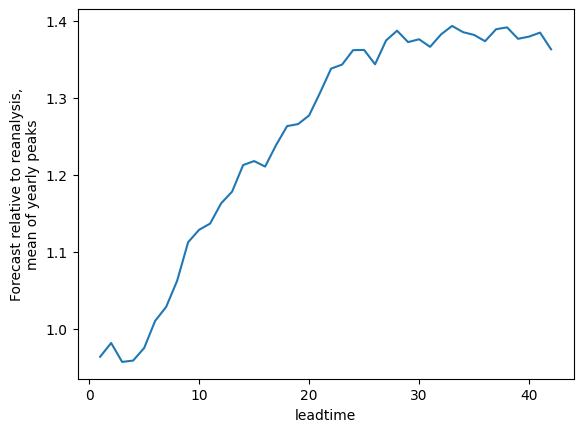

In [99]:
fig, ax = plt.subplots()
df_compare.groupby("leadtime")["rel_f_a"].mean().plot(ax=ax)
ax.set_ylabel("Forecast relative to reanalysis,\nmean of yearly peaks")

In [83]:
df_compare_daily = df_ref.merge(df_rea, on="valid_time", suffixes=("_f", "_a"))
df_compare_daily

,valid_time,leadtime,dis24_f,issued_time,dis24_a
0,2003-07-04,1,452.635925,2003-07-04,499.390625
1,2003-07-05,2,573.265625,2003-07-04,524.328125
2,2003-07-06,3,599.796875,2003-07-04,503.625000
3,2003-07-07,1,504.167175,2003-07-07,474.218750
4,2003-07-07,4,563.751587,2003-07-04,474.218750
...,...,...,...,...,...
26455,2022-11-30,35,97.370316,2022-10-27,94.343750
26456,2022-12-01,32,95.339066,2022-10-31,93.289062
26457,2022-12-02,33,94.142189,2022-10-31,92.281250
26458,2022-12-03,34,93.082809,2022-10-31,91.273438


In [85]:
df_compare_daily["rel_f_a"] = (
    df_compare_daily["dis24_f"] / df_compare_daily["dis24_a"]
)

Text(0, 0.5, 'Forecast relative to reanalysis,\nmean of all daily values')

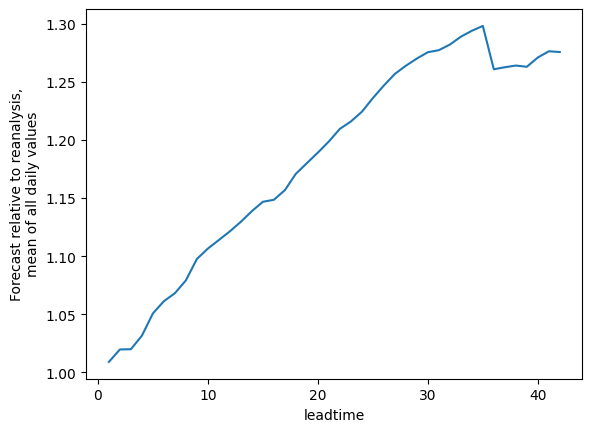

In [94]:
fig, ax = plt.subplots()
df_compare_daily.groupby("leadtime")["rel_f_a"].mean().plot(ax=ax)
ax.set_ylabel("Forecast relative to reanalysis,\nmean of all daily values")